# Step 1: Loading and Exploring the Dataset

Dataset shape: (1797, 64)


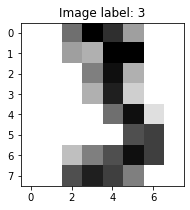

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Print the shape of the data to understand its size
print("Dataset shape:", digits.data.shape)

# Display one sample image
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Image label: {digits.target[sample_index]}")
plt.show()

# Step 2: Preprocessing the Data

Training set shape: (1527, 64)
Test set shape: (270, 64)


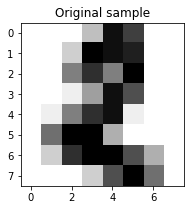

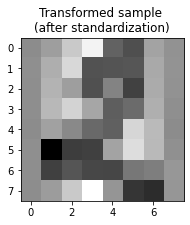

In [55]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


## Convert data to the right format
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

# Normalize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the new sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


## Visualizing Normalization
sample_index = 45

# Show the original sample
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Original sample")
plt.show()

# Show a transformed sample
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Transformed sample \n(after standardization)")
plt.show()

# Step 3: Preparing Labels for Classification

In [56]:
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical

# Look at original labels
print("Original labels:\n", y_train[:3])

# Convert to one-hot encoding
Y_train = to_categorical(y_train)
print("\nOne-hot encoded labels:\n", Y_train[:3])

Original labels:
 [2 9 5]

One-hot encoded labels:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# Step 4: Building and Training the Neural Network

In [57]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers


## Define the model
N = X_train.shape[1]  # 64 (input features)
H = 100               # 100 neurons in hidden layer
K = 10                # 10 classes (output)

model = Sequential()
model.add(Dense(H, input_dim=N))    # Hidden layer
model.add(Activation("tanh"))       # Activation function
model.add(Dense(K))                 # Output layer
model.add(Activation("softmax"))    # Output activation

print("Neural Network is built")

Neural Network is built


## Step 4.1: Train the Model


Weights:
 [[ 0.1609431   0.12122254  0.01260176 ...  0.09876482 -0.00856794
  -0.05460612]
 [ 0.10650776 -0.18573831 -0.14796509 ...  0.12377281  0.05433822
   0.17167343]
 [ 0.09437637 -0.03221381  0.04401268 ...  0.05504666  0.05405305
  -0.1504116 ]
 ...
 [ 0.03502865 -0.08525019  0.08140846 ...  0.00138323  0.12844597
  -0.17175186]
 [ 0.039574   -0.18919748  0.03533192 ... -0.10634921  0.15241595
   0.18416692]
 [-0.07531757  0.05996035 -0.16356917 ... -0.1844851   0.1822427
  -0.14852086]]

Weights Standard Deviation:
 0.10920088

Biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Epoch 1/15
1527/1527 [==============================] - 0s 81us/step - loss: 0.8387 - accuracy: 0.7747
Epoch 2/15
1527/1527 [================

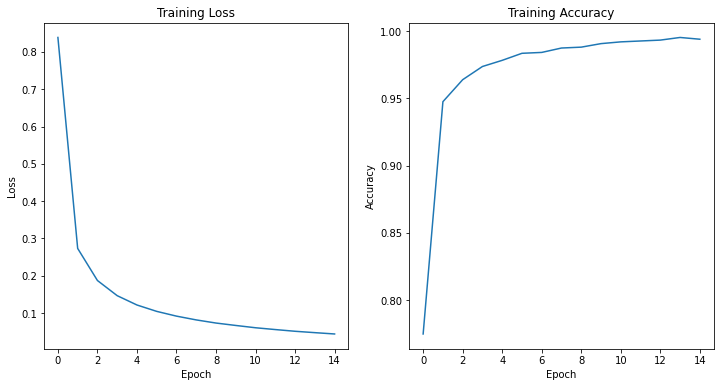

270/270 [==============================] - 0s 268us/step
Test Loss: 0.0858
Test Accuracy: 0.9741


In [58]:
## Compile the Model
model.compile(optimizer=optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Weights and Biases
weights = model.layers[0].weights[0].eval(keras.backend.get_session())
print("\nWeights:\n", weights)
print("\nWeights Standard Deviation:\n", weights.std())
biases = model.layers[0].weights[1].eval(keras.backend.get_session())
print("\nBiases:\n", biases)

# Train the model
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Show model summary
model.summary()


## Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

## Step 4.2: Train the Model (lr=0.1 --> lr=0.001)

Epoch 1/15
1527/1527 [==============================] - 0s 87us/step - loss: 0.0399 - accuracy: 0.9961
Epoch 2/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.0398 - accuracy: 0.9961
Epoch 3/15
1527/1527 [==============================] - 0s 20us/step - loss: 0.0398 - accuracy: 0.9961
Epoch 4/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.0398 - accuracy: 0.9961
Epoch 5/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.0398 - accuracy: 0.9961
Epoch 6/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.0397 - accuracy: 0.9961
Epoch 7/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.0397 - accuracy: 0.9961
Epoch 8/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.0397 - accuracy: 0.9961
Epoch 9/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.0396 - accuracy: 0.9961
Epoch 10/15
1527/1527 [==============================] - 0s 18us/step - l

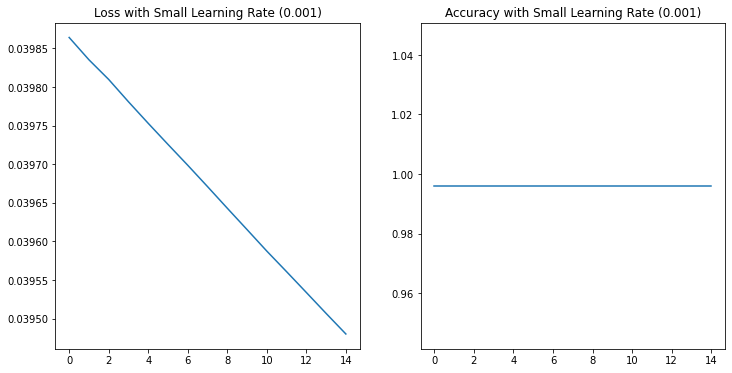

270/270 [==============================] - 0s 329us/step
Test Loss: 0.0855
Test Accuracy: 0.9741


In [59]:
## Compile the model
model.compile(optimizer=optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_slow = model.fit(X_train, Y_train, epochs=15, batch_size=32)


## Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_slow.history['loss'])
plt.title('Loss with Small Learning Rate (0.001)')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_slow.history['accuracy'])
plt.title('Accuracy with Small Learning Rate (0.001)')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 5: Building and Training the Neural Network (normal initialization)

In [60]:
from keras import initializers

## Define the model with normal initialization
normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))    # Hidden layer
model.add(Activation("tanh"))                                       # Activation function
model.add(Dense(K, kernel_initializer=normal_init))                 # Output layer
model.add(Activation("softmax"))                                    # Output activation

print("Neural Network is built with normal initialization")

Neural Network is built with normal initialization


## Step 5.1: Train the Model

Epoch 1/15
1527/1527 [==============================] - 0s 96us/step - loss: 1.9891 - accuracy: 0.6077
Epoch 2/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.8721 - accuracy: 0.8114
Epoch 3/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.4415 - accuracy: 0.9057
Epoch 4/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.2752 - accuracy: 0.9456
Epoch 5/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.2028 - accuracy: 0.9607
Epoch 6/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.1640 - accuracy: 0.9725
Epoch 7/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.1389 - accuracy: 0.9764
Epoch 8/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.1215 - accuracy: 0.9777
Epoch 9/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.1079 - accuracy: 0.9810
Epoch 10/15
1527/1527 [==============================] - 0s 19us/step - l

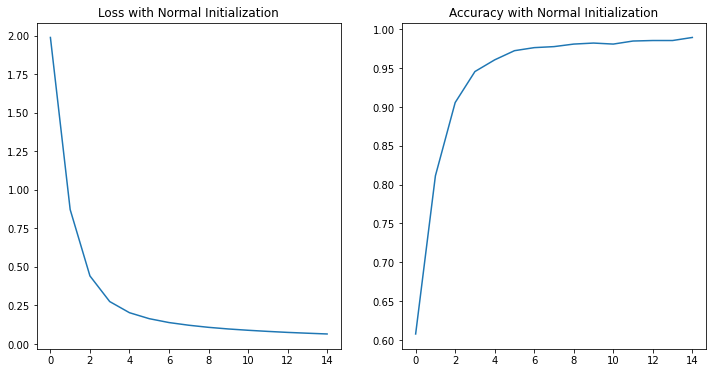

270/270 [==============================] - 0s 404us/step
Test Loss: 0.0989
Test Accuracy: 0.9741


In [61]:
## Compile the model
model.compile(optimizer=optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_init = model.fit(X_train, Y_train, epochs=15, batch_size=32)


## Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_init.history['loss'])
plt.title('Loss with Normal Initialization')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_init.history['accuracy'])
plt.title('Accuracy with Normal Initialization')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 6: Building and Training the Neural Network (more layers or neurons (H --> 200))

In [62]:
from keras import initializers

# Use normal initialization
normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(200, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

print("Neural Network is built with more layers or neurons")

Neural Network is built with more layers or neurons


## Step 6.1: Train the Model (different optimizer (SGD --> optimizers.Adam))

Epoch 1/15
1527/1527 [==============================] - 0s 132us/step - loss: 1.6028 - accuracy: 0.7675
Epoch 2/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.5010 - accuracy: 0.8867
Epoch 3/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.2427 - accuracy: 0.9456
Epoch 4/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.1633 - accuracy: 0.9692
Epoch 5/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.1249 - accuracy: 0.9731
Epoch 6/15
1527/1527 [==============================] - 0s 20us/step - loss: 0.1011 - accuracy: 0.9784
Epoch 7/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.0866 - accuracy: 0.9843
Epoch 8/15
1527/1527 [==============================] - 0s 20us/step - loss: 0.0728 - accuracy: 0.9849
Epoch 9/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.0632 - accuracy: 0.9882
Epoch 10/15
1527/1527 [==============================] - 0s 20us/step - 

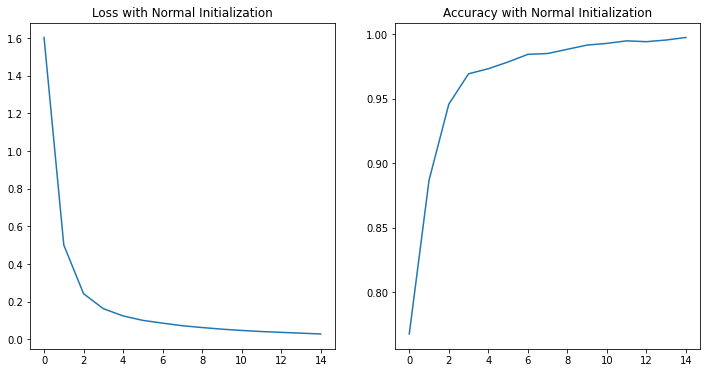

270/270 [==============================] - 0s 346us/step
Test Loss: 0.0784
Test Accuracy: 0.9704


In [63]:
## Compile the model
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_init = model.fit(X_train, Y_train, epochs=15, batch_size=32)


## Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_init.history['loss'])
plt.title('Loss with Normal Initialization')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_init.history['accuracy'])
plt.title('Accuracy with Normal Initialization')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")